In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# imports best practice sklearn
import sklearn
from sklearn import set_config

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.datasets import fetch_california_housing


# model selection e hiperparameters optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold

from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.datasets import fetch_california_housing
from sklearn.impute import KNNImputer
import random

In [ ]:
df_sample = pd.read_csv("/content/drive/MyDrive/TFM/clusters/df_sample.csv")

In [ ]:
df_sample.set_index(['pk_cid'], inplace=True)

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1087455 to 1083579
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          15000 non-null  int64  
 1   region_code  15000 non-null  int64  
 2   salary       15000 non-null  float64
 3   segment      15000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 585.9 KB


In [ ]:
def plot_euclidean_distance():

# instanciamos la figure y el axes
 fig = plt.figure(figsize = (10, 10))
 ax = fig.add_subplot(111)
 # creamos una espacio cartesiona
 lims = (-10, 10)
 alpha = 0.5
 ax.set_xlim(lims)
 ax.set_ylim(lims)
 # pintamos lineas horizontales y verticales
 ax.vlines(0, -10, 10, linestyles = "--", alpha = alpha)
 ax.hlines(0, -10, 10, linestyles = "--", alpha = alpha)
 # pintamos los dos catetos y la hipotenusa
 ax.plot([0, 5], [0, 5], alpha = alpha, color = "red", lw = 2) # hipotenusa
 ax.text(2, 3.5, s = "d", fontsize = 8, color = "red")
 ax.plot([0, 5], [0, 0], alpha = alpha, color = "blue", lw = 2) # cateto azul
 ax.text(1.5, -1, s = "x2 - x1", fontsize = 8, color = "blue")
 ax.plot([5, 5], [5, 0], alpha = alpha, color = "green", lw = 2) # cateto verde
 # origen
 ax.scatter([0, 0], [0, 0], alpha = alpha, color = "black", lw = 2)
 ax.text(-1, -1, s = "(x1, y1)", fontsize = 8, color = "black")
 # punto 2
 ax.scatter([0, 5], [0, 5], alpha = alpha, color = "black", lw = 2)
 ax.text(5.5, 5.5, s = "(x2, y2)", fontsize = 8, color = "black")
 # punto en el eje x
 ax.scatter([5, 0], [0, 0], alpha = alpha, color = "black", lw = 2)
 # cálculo
 ax.text(1.5, -1, s = "x2 - x1", fontsize = 8, color = "blue")
 ax.text(5.5, 2, s = "y2 - y1", fontsize = 8, color = "green")
 # creamos las listas para los ejes (-10 hasta 10)
 x_ticks = [x for x in range(-10, 11)]
 y_ticks = [y for y in range(-10, 11)]
 # enumeramos los ejes desde -10 hasta 10
 ax.set_xticks(x_ticks)
 ax.set_yticks(y_ticks)
 # ponemos el título
 fig.suptitle("Euclidean Distance Between 2 Vectors in a 2D Space")

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df_sample)

In [ ]:
def calculate_distances(X, index, distance_func):  # Calculates the distances between vectors with the specified function you pass. Returns a pandas DataFrame.
    distances = distance_func(X = X)
    distances = pd.DataFrame(distances, index = index, columns = index)
    distances = round(distances, 1)
    distances.replace(to_replace = 0, value = np.nan, inplace = True)
    return distances

In [ ]:
def format_cell_based_on_target_value(value, target_value, highlight = 'background-color: yellow'): #Formats a cell based on a target_value. Returns a background color or pass.
    if value == None:
        pass
    elif value == target_value:
        return highlight
    else:
        return ""

In [ ]:
COLOR = "#2a9d8f"
COLOR_MAX = "#D8E4FF"

In [ ]:
distances = calculate_distances(
    X = df_scaled,
    index = df_scaled.index,
    distance_func = euclidean_distances)
distances.style.highlight_min(axis = 1, color = COLOR)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pipe = Pipeline(steps = [
 ("Imputer", KNNImputer()),
 ("Clustering", KMeans(n_clusters = 4, random_state = 175))])

In [ ]:
df_scaled_transformed = pipe.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sse = {}

In [ ]:
for k in range(2, 15):
    print(f"Fitting pipe with {k} clusters")
    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled)
    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 3 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 4 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 5 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 6 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 7 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 8 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 9 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 10 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 11 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 12 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 13 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 14 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


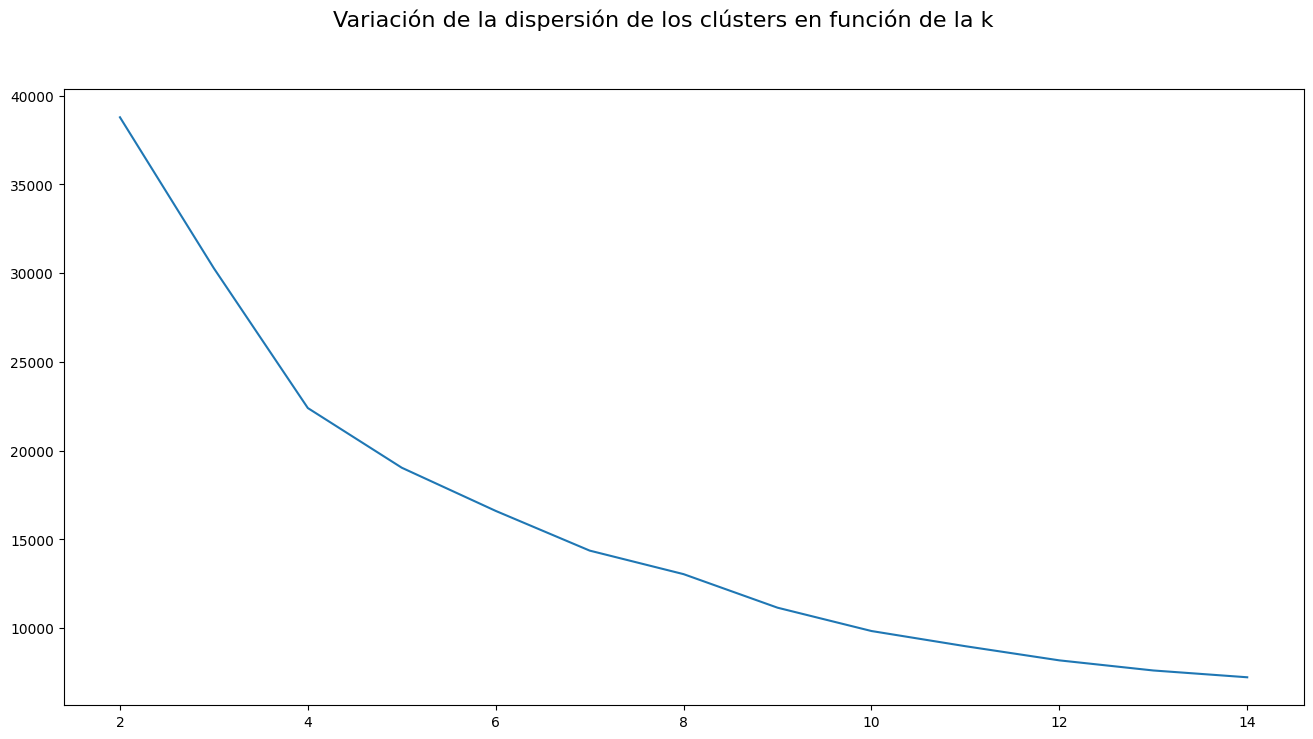

In [ ]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()
x_values = list(sse.keys())
y_values = list(sse.values())
ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16)
plt.show()

En el gráfico del codo se muestra como es viable hacer entre 4 a 6 clusters.

Ahora que hemos determinado el número de centroides correcto podemos fittear nuestro pipeline con la ***k adecuada.***

Dado que vamos a realizar nuestra segmentación con KMeans y vamos a suministrarle las variables de nuestro interés a
veces a KMeans se le conoce como **segmentación no supervisada pero guiada**. Guiada porque de alguna manera el data
scientist le dice (lo guía) a que discrimine usando unas variables y no otras.

In [ ]:
df_clustering = pd.read_csv("/content/drive/MyDrive/TFM/clusters/df_clustering.csv")

In [ ]:
df_clustering.set_index(["pk_cid"], inplace=True)

In [ ]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331493 entries, 657826 to 1550586
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   entry_channel        331493 non-null  int64  
 1   active_customer      331493 non-null  int64  
 2   segment              331493 non-null  int64  
 3   country_id           331493 non-null  int64  
 4   region_code          331493 non-null  int64  
 5   gender               331493 non-null  int64  
 6   age                  331493 non-null  int64  
 7   salary               331493 non-null  float64
 8   entry_date_year      331493 non-null  int64  
 9   entry_date_month     331493 non-null  int64  
 10  activos_financieros  331493 non-null  int64  
 11  cuenta_operaciones   331493 non-null  int64  
 12  creditos_prestamos   331493 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 35.4 MB


In [ ]:
pipe.fit(df_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('Imputer', KNNImputer()),
                ('Clustering', KMeans(n_clusters=4, random_state=175))])

In [ ]:
pipe["Clustering"].cluster_centers_

array([[5.52525109e+01, 5.02046998e-01, 2.63936805e+00, 9.99646080e-01,
        2.62153078e+01, 5.19363581e-01, 3.01967733e+01, 9.04536216e+04,
        2.01671082e+03, 8.06667729e+00, 7.82068042e-02, 1.09648631e+00,
        1.44491917e-01],
       [5.34090909e+01, 3.63636364e-01, 2.63636364e+00, 1.00000000e+00,
        3.09545455e+01, 6.81818182e-01, 3.08181818e+01, 1.05056738e+07,
        2.01631818e+03, 8.77272727e+00, 4.54545455e-02, 1.09090909e+00,
        1.36363636e-01],
       [5.21266159e+01, 5.11374541e-01, 2.64188541e+00, 9.99435507e-01,
        2.40815693e+01, 5.00762066e-01, 3.13938470e+01, 3.32619678e+05,
        2.01629517e+03, 7.94089754e+00, 1.13406717e-01, 1.12085803e+00,
        1.54671183e-01],
       [5.22698413e+01, 6.11111111e-01, 2.61111111e+00, 1.00000000e+00,
        2.54285714e+01, 5.31746032e-01, 3.21031746e+01, 3.00201300e+06,
        2.01636508e+03, 7.57142857e+00, 9.52380952e-02, 1.11904762e+00,
        3.09523810e-01]])

In [ ]:
pipe["Clustering"].cluster_centers_.shape

(4, 13)

In [ ]:
pipe.predict(df_clustering)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
labels = pipe.predict(df_clustering)

In [ ]:
df_clustering["Clustering"] = labels

In [ ]:

df_clustering[df_clustering["Clustering"] == 1]

,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month,activos_financieros,cuenta_operaciones,creditos_prestamos,Clustering
pk_cid,,,,,,,,,,,,,,
1362782,57,0,3,1,41,0,22,11341152.48,2017,11,0,1,0,1
1329461,57,1,3,1,29,0,30,13268621.28,2017,10,0,1,0,1
1331578,57,1,3,1,28,1,23,9659263.86,2017,10,0,1,0,1
1305927,57,0,3,1,41,1,23,11341152.48,2017,9,0,1,0,1
1431895,62,0,2,1,28,1,31,8667715.11,2018,8,0,1,0,1
1072429,57,0,3,1,28,0,31,11804014.98,2015,10,0,1,0,1
1104456,57,0,3,1,28,0,27,11139895.56,2015,11,0,1,0,1
1036888,57,0,3,1,28,1,24,9990379.74,2015,7,0,1,0,1
1209096,57,0,3,1,41,1,22,11341152.48,2016,10,0,1,0,1


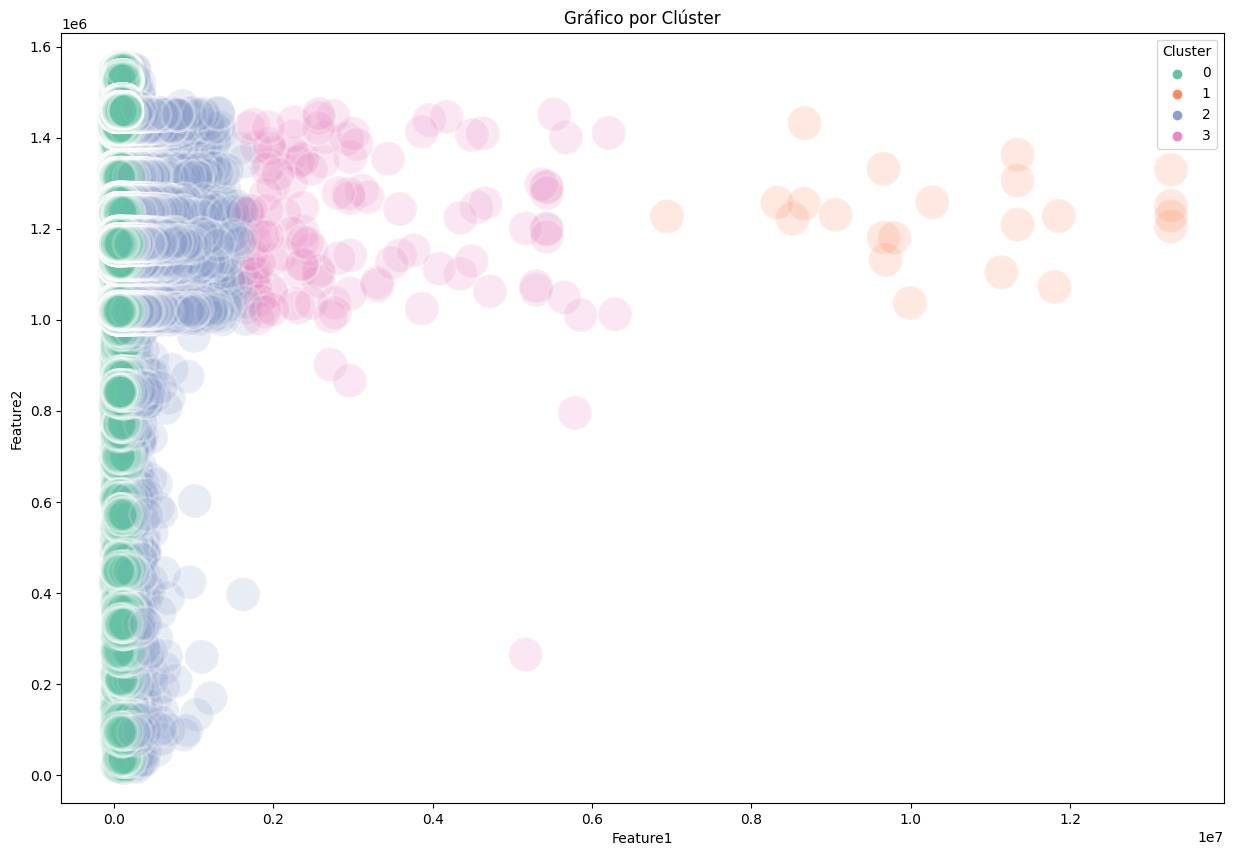

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x= "salary", y= "pk_cid", hue ="Clustering", data = df_clustering, alpha = 0.2, palette = "Set2", s = 600)       # el atributo alpha es para la transparencia
# edgecolors = "black" ---> linewidths = 1.5  es para poner los marcadores con el borde negro
# marker = "o", "*", r"$\clubsuit$"
plt.title('Gráfico por Clúster')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331493 entries, 657826 to 1550586
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   entry_channel        331493 non-null  int64  
 1   active_customer      331493 non-null  int64  
 2   segment              331493 non-null  int64  
 3   country_id           331493 non-null  int64  
 4   region_code          331493 non-null  int64  
 5   gender               331493 non-null  int64  
 6   age                  331493 non-null  int64  
 7   salary               331493 non-null  float64
 8   entry_date_year      331493 non-null  int64  
 9   entry_date_month     331493 non-null  int64  
 10  activos_financieros  331493 non-null  int64  
 11  cuenta_operaciones   331493 non-null  int64  
 12  creditos_prestamos   331493 non-null  int64  
 13  Clustering           331493 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 36.7 MB


In [ ]:
df_clustering.to_csv("/content/drive/MyDrive/TFM/clusters/df_cluster_4.csv")